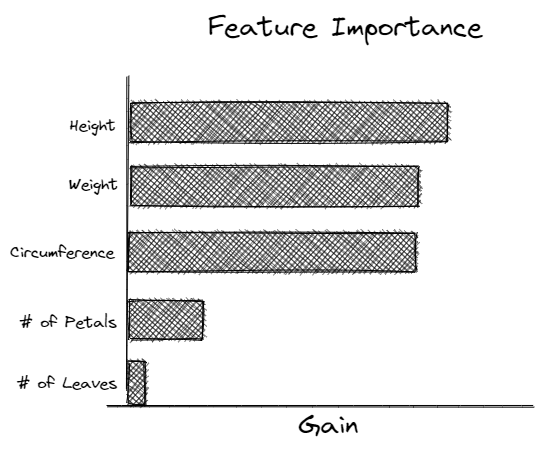

## Notebook

### https://github.com/r-clements/feature-importance

## References

Molnar, Christoph. “Interpretable machine learning. A Guide for Making Black Box Models Explainable”, 2019. https://christophm.github.io/interpretable-ml-book/.

## Data

We will continue to use the Cervical Cancer dataset from previous lessons. Original unprocessed version can be downloaded  at https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29.

## From last time

Recall that last time we learned about Feature Engineering, and getting your features ready for modeling by dealing with missing values, outliers, zero-variance features, highly correlated features, and categorical variables. Today we will talk about another useful tool for developing good models and selecting features: feature importance!

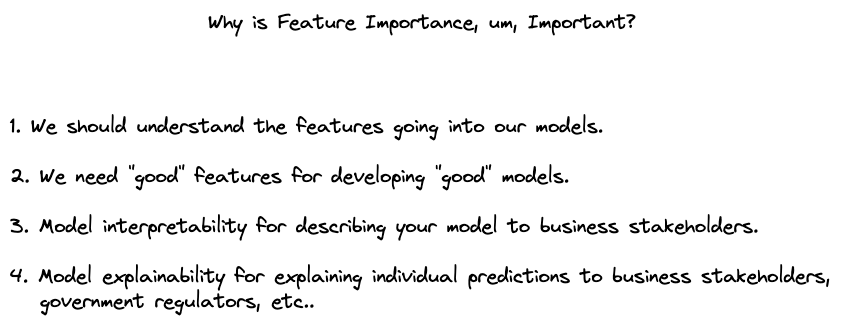

Today we will focus only on introducing concepts for 1-3. While 4 (Explainability) is important, it is a **big** topic and needs more time. But, really quickly, I will explain one of the *key* differences between what we will focus on now, versus in the future when we go over Model Explainability.

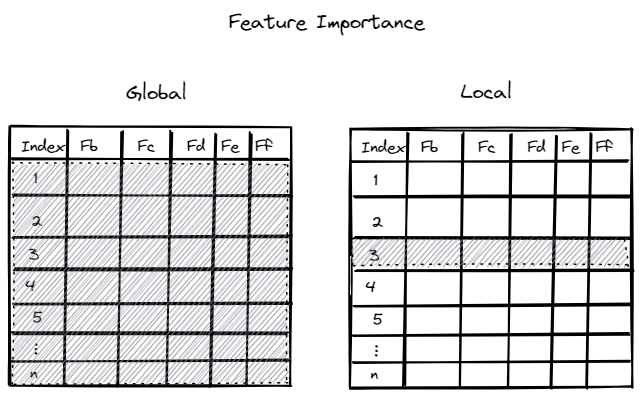

Today our focus is on "Global" feature importance, which will tell us, on average, which features are the most important for our models. "Local" feature importance tells us how each of our features influenced a specific prediction for a specific observation in our data. In the future we will show how Global and Local importance, when combined, can be used for explaining our models' predictions.

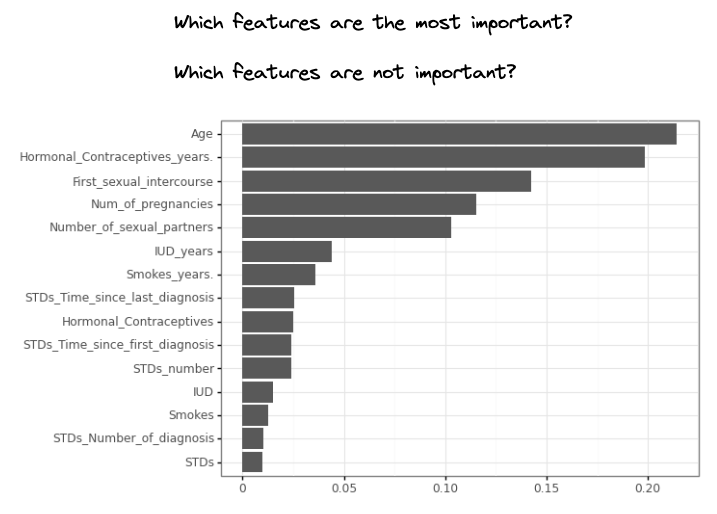

In [61]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_bar, geom_col, coord_flip, theme_bw, xlab, ylab
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

cerv = pd.read_csv('cervical.csv')
cerv_x = cerv.drop('Biopsy', axis = 1)
cerv_y = np.ravel(cerv[['Biopsy']])

x_train, x_test, y_train, y_test = train_test_split(cerv_x, cerv_y, test_size = .25, random_state = 1234)

rf_mod = RandomForestClassifier(n_estimators=500)

rf_mod.fit(x_train, y_train)

feat_sort = rf_mod.feature_importances_.argsort()

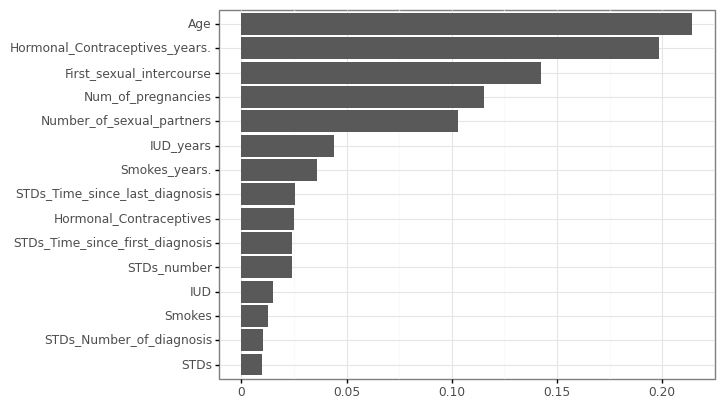

<ggplot: (8762300275122)>

In [63]:
feat_imp = pd.DataFrame({"features":cerv_x.columns[feat_sort], "importance":rf_mod.feature_importances_[feat_sort]})

feat_imp['features'] = pd.Categorical(feat_imp['features'], categories=feat_imp['features'], ordered=True)

ggplot(feat_imp) + geom_col(aes(x = 'features', y = 'importance')) + coord_flip() + ylab('') + xlab('') + theme_bw()
#feat_imp = pd.DataFrame(features = cerv_x.columns, importance = rf_mod.feature_importances_)

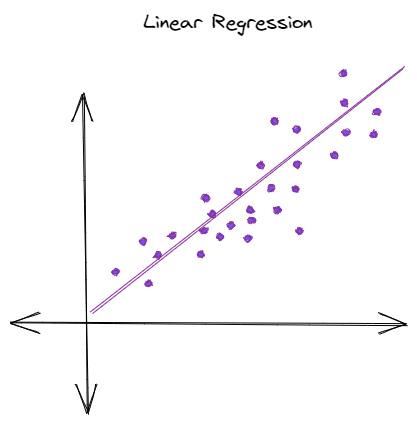

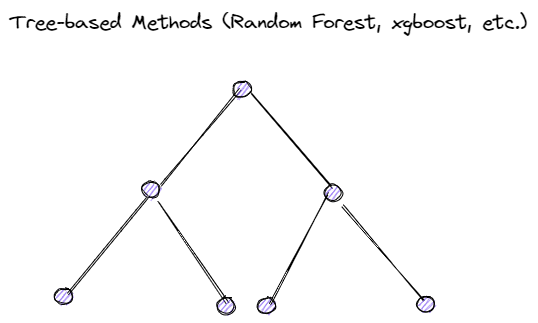

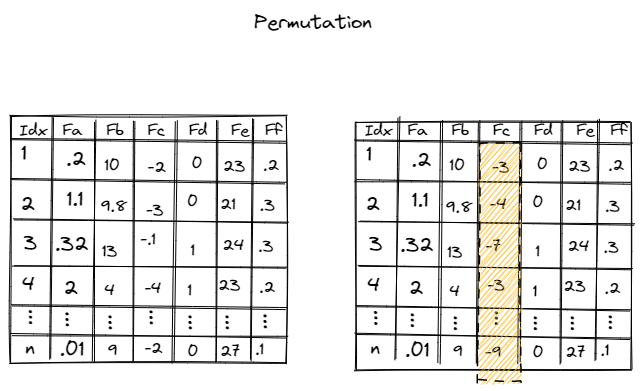